In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import os

In [5]:
def print_trajectory(df, plant):
    if plant is True:
        img = plt.imread("/Users/chainz/Desktop/Tese/Dados/mapa original.png")
        fig, ax = plt.subplots()
        ax.imshow(img, extent=[0, 3136, 0, 2475])

    min_x = abs(min(df["x_floorplan"]))
    min_y = abs(min(df["y_floorplan"]))
    
    for cust_id in df["Customer_id"].unique():
        customer_data = df[df["Customer_id"] == cust_id]
        if cust_id != 1848.0:
            plt.scatter(((customer_data["x_floorplan"] + min_x) * 35.763) + 1070, ((customer_data["y_floorplan"] + min_y) * 32.905) + 1200, s=0.01, marker="1", color="blue")
    for cust_id in df["Customer_id"].unique():
        customer_data = df[df["Customer_id"] == cust_id]
        if cust_id == 1848.0:
            plt.scatter(((customer_data["x_floorplan"] + min_x) * 35.763) + 1070, ((customer_data["y_floorplan"] + min_y) * 32.905) + 1200, s=0.01, marker="1", color="red")
    plt.savefig('/Users/chainz/Desktop/Tese/Dados/Projeções/mapa_modificado_1camera.png', dpi=1200)

### Apenas com a camera 1.03

In [6]:
li = []

path_local = "/Users/chainz/Desktop/Tese/Dados/Trajetorias/14.03.2022/1.03"
path_jupyter = "Tese/Dados/Trajetorias/14.03.2022/1.03"

files = os.path.join(path_local, "*.csv")
files = glob.glob(files)

for filename in files:
    df1 = pd.read_csv(filename, low_memory=False, index_col=None, header=0)
    li.append(df1)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,ymin_track,...,ymin_real,xmax_real,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan
0,0,1692.108765,205.456512,1772.207520,421.875183,0.775920,0.0,person,1692.0,205.0,...,205.456512,1772.207520,421.875183,797,3831.0,17:21:45,1732.0,421.0,-355.464729,-55.383632
1,0,1691.646729,225.293152,1794.126831,437.973938,0.757208,0.0,person,1701.0,222.0,...,225.293152,1794.126831,437.973938,802,3831.0,17:21:46,1742.0,437.0,-355.628741,-55.488044
2,0,1702.515137,240.894806,1810.202759,443.246063,0.738585,0.0,person,1715.0,237.0,...,240.894806,1810.202759,443.246063,806,3831.0,17:21:47,1756.0,443.0,-355.648193,-55.572507
3,0,1748.897461,247.263306,1824.259644,444.307709,0.452792,0.0,person,1743.0,247.0,...,247.263306,1824.259644,444.307709,810,3831.0,17:21:48,1786.0,444.0,-355.543589,-55.710914
4,0,1739.542725,261.810883,1837.716919,473.746399,0.704984,0.0,person,1750.0,260.0,...,261.810883,1837.716919,473.746399,814,3831.0,17:21:48,1788.0,473.0,-355.883439,-55.808717


#### Projeção das coordenadas capturadas pela camera 1.03

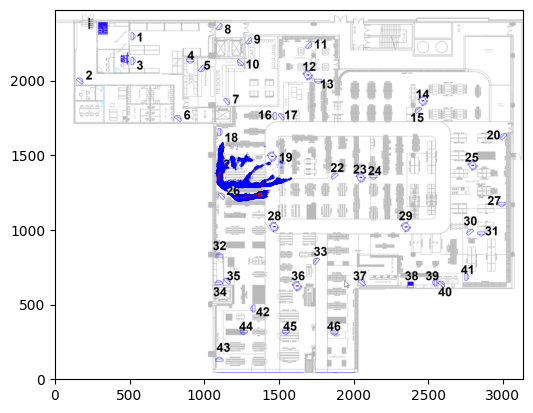

In [7]:
print_trajectory(frame, True)

## Com todas as cameras

In [8]:
my_list = os.listdir("/Users/chainz/Desktop/Tese/Dados/Trajetorias/14.03.2022/")
remove_words = ["teste", ".ipynb_checkpoints"]
camera_list = list(filter(lambda directory: directory not in remove_words, my_list))

data_from_cameras = []

for camera in camera_list:
    files = os.path.join("/Users/chainz/Desktop/Tese/Dados/Trajetorias/14.03.2022/" + str(camera), "*.csv")
    files = glob.glob(files)

    for filename in files:
        df1 = pd.read_csv(filename, low_memory=False, index_col=None, header=0)
        df1["camera"] = camera
        data_from_cameras.append(df1)

In [9]:
all_data = pd.concat(data_from_cameras, axis=0, ignore_index=True)
all_data.head()

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,ymin_track,...,xmax_real,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan,camera
0,0,1095.267334,392.251648,1213.007812,783.743225,0.692393,0.0,person,1077.0,389.0,...,1213.007812,783.743225,1,4004.0,16:16:37,1154.0,783.0,-353.536231,-62.113517,2.11
1,0,1242.442383,357.908600,1353.602417,559.410095,0.700752,0.0,person,1242.0,357.0,...,1353.602417,559.410095,12,4006.0,16:16:39,1298.0,559.0,-354.777443,-58.485515,2.11
2,0,1267.479614,361.214996,1371.252808,551.946045,0.640179,0.0,person,1263.0,360.0,...,1371.252808,551.946045,14,4006.0,16:16:39,1319.0,551.0,-354.753740,-58.250651,2.11
3,0,1102.333740,289.519379,1198.998657,461.136566,0.482107,0.0,person,1107.0,289.0,...,1198.998657,461.136566,18,4005.0,16:16:40,1150.0,461.0,-356.935060,-56.902427,2.11
4,0,1304.138306,326.691437,1435.317261,543.572937,0.655119,0.0,person,1320.0,325.0,...,1435.317261,543.572937,20,4004.0,16:16:40,1369.0,543.0,-354.574735,-57.900517,2.11


#### Projeção das coordenadas, colorido por cliente

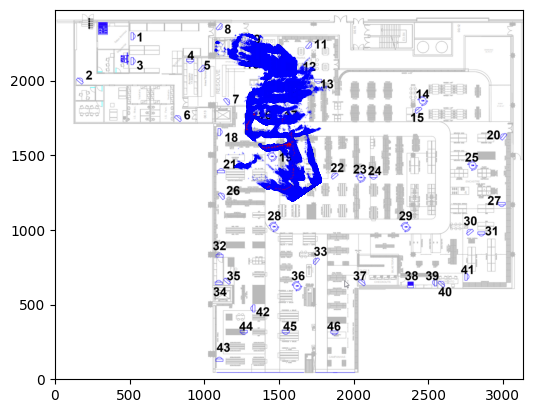

In [10]:
print_trajectory(all_data, True)

In [9]:
def print_trajectory_percamera(df, plant):
    if plant is True:
        img = plt.imread("/Users/chainz/Desktop/Tese/Dados/mapa original.png")
        fig, ax = plt.subplots()
        ax.imshow(img, extent=[-398.5*10, -298.5*10, -85*10, -3*10])
    
    for camera in df["camera"].unique():
        camera_data = df[df["camera"] == camera]
        plt.scatter(camera_data["x_floorplan"], camera_data["y_floorplan"], s=0.1, marker="o", color=get_color(camera))
    plt.savefig('/Users/chainz/Desktop/Tese/Dados/mapa_modificado.png', dpi=1200)
        
def get_color(camera):
    if camera == "1.03":
        return "#FD0100" #vermelho
    elif camera == "1.04":
        return "#F76915" #laranja
    elif camera == "1.05":
        return "#EEDE04" #amarelo
    elif camera == "2.05":
        return "#2FA236" #verde
    elif camera == "2.11":
        return "#333ED4" #azul

#### Projeção das coordenadas, colorido por camera

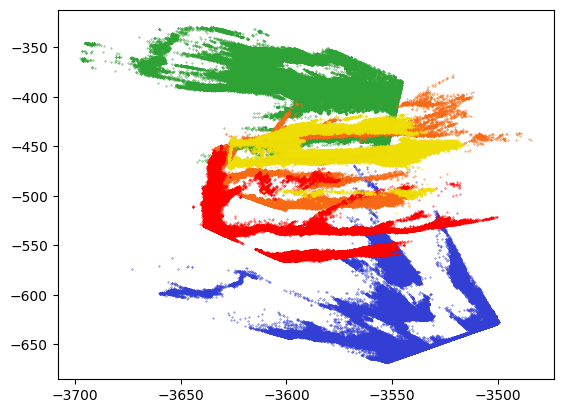

In [10]:
print_trajectory_percamera(all_data, False)

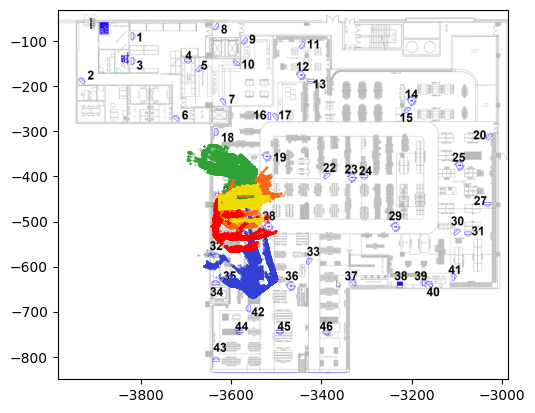

In [11]:
print_trajectory_percamera(all_data, True)

## Conclusões: